# Exploratory Data Analysis on the Fake + Real News Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import string
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import collections
from sklearn.feature_extraction.text import TfidfVectorizer

First, let's take a look at the shape and general information contained with the dataset.

In [2]:
df = pd.read_csv("news.csv")

In [3]:
df.shape

(6335, 4)

In [4]:
df.head

<bound method NDFrame.head of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello.

In [5]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

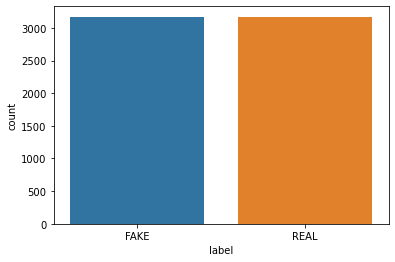

In [6]:
sns.countplot(x="label", data=df)

In [7]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

There's almost a perfect split between real and fake news to discern between. This makes modeling for a dataset much easier.

## Data Cleaning for Exploratory Data Analysis

A good portion of text contains information that can't be used effectively for a machine learning model or for visual analysis. To ammend this, we can update the text of each article by removing punctuation, links, numbers, and stopwords (common unimportant words such as prepositions, conjunctions, etc).

In [8]:
def update_text(text):
    # Make everything lowercase
    text = str(text).lower()
    # Remove text in brackets
    text = re.sub('\[.*?\]', '', text)
    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = re.sub('<.*?>+-', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    
    # Remove stop words i.e. 'the', 'in', 'and', etc
    stop = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

Let's compare a piece of text before and after updating it with our previously mentioned rules.

In [9]:
df.text[0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [10]:
update_text(df.text[0])

'daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word “unprecedented” thrown around often election ought retired it’s still unprecedented nominee major political party go war fbi that’s exactly hillary people done coma patients waking watching hour cnn hospital beds would assume fbi director james comey hillary’s opponent election fbi attack everyone obama cnn hillary’s people circulated letter attacking comey currently media hit pieces lambasting targeting trump wouldn’t surprising clintons allies start running attack ads fbi fbi’s leadership warned entire leftwing establishment form lynch mob continue going hillary fbi’s credibility attacked media democrats preemptively head results investigation clinton foundation hillary clinton covert struggle fbi agents obama’s doj people gone explosively public new york times compared comey j edgar hoover bizarre headline “james comey ro

In [11]:
df['updated_text'] = df['text'].apply(lambda x: update_text(x))

# Data Visualization

Now that the text has been updated, we can plot the differences between fake news texts and real news texts.

In [12]:
fake_words = " ".join(df.loc[(df.label == 'FAKE')].updated_text)
real_words = " ".join(df.loc[(df.label == 'REAL')].updated_text)

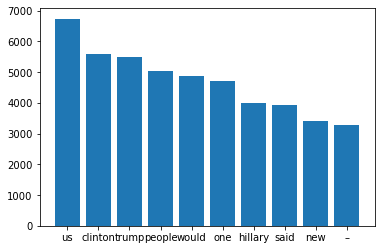

<Figure size 720x1800 with 0 Axes>

In [13]:
wordcount = collections.defaultdict(int)
for word in fake_words.split():
    wordcount[word] +=1
    
mc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:10]

mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
plt.bar(range(len(mc)),values,tick_label=names)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(25)
plt.show()

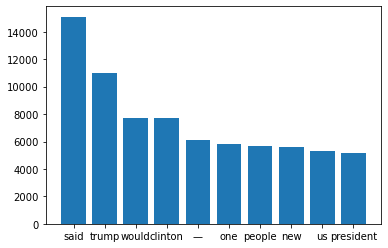

<Figure size 720x1800 with 0 Axes>

In [14]:
wordcount = collections.defaultdict(int)
for word in real_words.split():
    wordcount[word] +=1
    
mc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:10]

mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
plt.bar(range(len(mc)),values,tick_label=names)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(25)
plt.show()

Based on these two plots above, it would seem that the most frequent words used are mostly the same. It also gives away the fact that this dataset was published during the height of the 2016 US Elections.

To give a better idea of the most common vocabulary used in these articles, I created two wordclouds to better paint the picture.

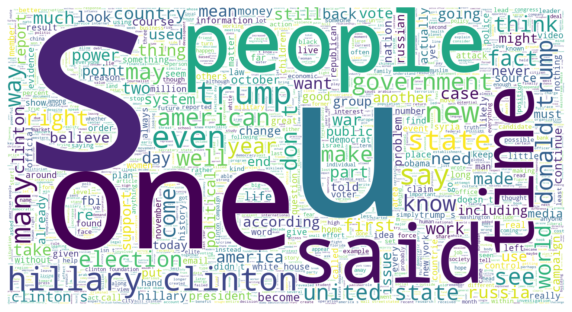

In [15]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=1500, height=800)
wc.generate(fake_words)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
wc.generate(real_words)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Both wordclouds have separated the U and S in U.S. Real news also contains more words with a medium frequency whereas fake news contains words that are either large or fairly miniscule.

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
words=df[df['label']=='REAL']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Real Text')
words=df[df['label']=='FAKE']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Fake Text')
fig.suptitle('Average Word Length')

Upon inspecting the average word length in both plots, it becomes apparent that the word lengths are fairly the same amongst real and fake news. Both even follow a normal distribution.

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_length=df[df['label']=='REAL']['text'].str.split().map(lambda x: len(x))
ax1.hist(text_length,color='blue')
ax1.set_title('Real Text')
text_length=df[df['label']=='FAKE']['text'].str.split().map(lambda x: len(x))
ax2.hist(text_length,color='red')
ax2.set_title('Fake Text')
fig.suptitle('Words Count')
plt.show()

Word count, however, does play a large role in distinguishing between the two types of articles. Real news articles are much longer than the average fake news articles.